# Predictive learning using kNN classifier (2)
## Dataset: ["Digits"](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)

## Analysis process flow
The picture attached below shows the steps followed for the resolution of the task. Q's represent in which step the questions asked in the task are answered.

![alt text](Analysis_workflow.png)

## STEP 1: Dataset exploration

In [1]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import pandas as pd

import numpy as np

import itertools

import matplotlib.pyplot as plt
%matplotlib inline

  > QUESTION 1: Using python examples developed in class, choose one of the following datasets and decribe what are its fields representing ("Digits", "Breast cancer").*

In [2]:
## Load sklearn "Digits" dataset
digitsData = load_digits()

## Assign data and target to X, y variables to be used later on
X = digitsData.data
y = digitsData.target
labelClasses = digitsData.target_names

In **"Digits"** dataset each sample includes the information of a **8x8 picture of a handwritten digit**. Dataset has 8 * 8 = 64 dimensions, each one representing the value of each pixel by an integer in the range 0 to 16, indicating different levels of black colour. Labels include the digits from 0 to 9.

**Visualization of the data**

***- Plotting the images***

Below there is a representation of several samples of the dataset "images" included within "Digits", included the labels assigned for each sample below the representations.

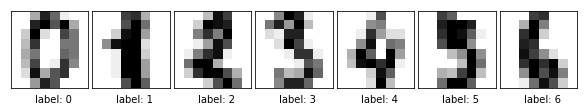

In [10]:
## Representation of several samples from the dataset using matplotlib

# Figures size for the representation
samplesFigure = plt.figure(figsize=(9, 9))

# Subplots for representing the labels assigned for each of the elements of samples figure
samplesFigure.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# Represent subplots for 7 samples
for i in range(7):
    # Add a subplot in the grid of 8x8 at the i+1 position
    subplot = samplesFigure.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    # Display an image at the i-th position
    subplot.imshow(digitsData.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    subplot.text(2, 9, "label: " + str(digitsData.target[i]))

# Show the plot
plt.show()

***- Using Principal Component Analysis (PCA)***

As the dataset has 64 dimensions, we can visualize the data with the help of one of the dimensionality reduction techniques: Principal Component Analysis (PCA). PCA finds a linear combination of the variables that contains most of the information. These new variables are called “principal components”, which are the directions that maximize the variance of the data.

Let's represent digits data using 2 components:

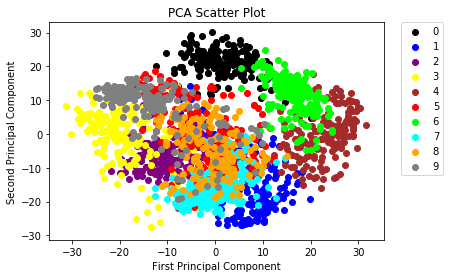

In [11]:
def plot_PCA(reducedData, colors):
    for i in range(len(colors)):
        xPlot = reducedData[:, 0][digitsData.target == i]
        yPlot = reducedData[:, 1][digitsData.target == i]
        plt.scatter(xPlot, yPlot, c=colors[i])
        plt.legend(digitsData.target_names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title("PCA Scatter Plot")
    plt.show()

colors = ['black', 'blue', 'purple', 'yellow', 'brown', 'red', 'lime', 'cyan', 'orange', 'gray']

# PCA
myPCA = PCA(n_components = 2)
X_PCA = myPCA.fit_transform(digitsData.data)
plot_PCA(X_PCA, colors)

How much variance does PCA with 2 components retain?

In [12]:
X_PCA = myPCA.fit(digitsData.data)
print (np.sum(X_PCA.explained_variance_ratio_))

0.2850936482367117


Using 2 components for PCA we are only retaining 28% of the variance. 

To estimate how many components are necessary to explain 90% of the variance of the model, we can run:

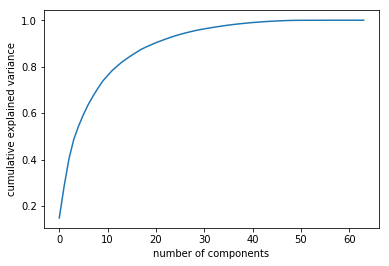

In [13]:
pca = PCA().fit(digitsData.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

Here we can see that for explaining 90% of the data we would need around 25 components.

***- Using TSNE (t-Distributed Stochastic Neighbor Embedding)***


From the graph above, we can see the two components definitely hold some information, especially for specific digits, but clearly not enough to set all of them apart. There is another technique that we can use to reduce the number of dimensionsknown as t-SNE (t-Distributed Stochastic Neighbouring Entities).

t-SNE is a technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. The technique can be implemented via Barnes-Hut approximations, allowing it to be applied on large datasets. The t-SNE algorithm comprises two main stages:
- First, t-SNE constructs a probability distribution over pairs of high-dimensional objects in such a way that similar objects have a high probability of being picked, whilst dissimilar points have an extremely small probability of being picked. 
- Second, t-SNE defines a similar probability distribution over the points in the low-dimensional map, and it minimizes the Kullback–Leibler divergence between the two distributions with respect to the locations of the points in the map.

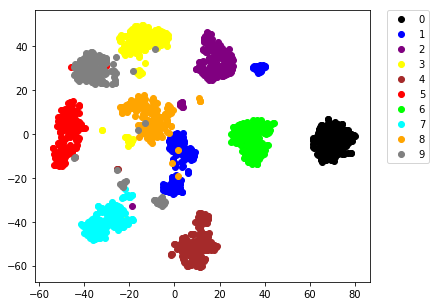

In [14]:
tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(digitsData.data)
target_ids = range(len(digitsData.target_names))

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 5))
colors = 'black', 'blue', 'purple', 'yellow', 'brown', 'red', 'lime', 'cyan', 'orange', 'gray'
for i, c, label in zip(target_ids, colors, digitsData.target_names):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
plt.legend(digitsData.target_names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

This is already a significant improvement over the PCA visualisation we used earlier. We can see that the digits are very clearly clustered in their own little group. 

> QUESTION 2: Describe the dataset in number of samples, dimensions, classes and samples per class using python.

In [15]:
## Number of samples and dimensions
print("Number of samples, number of dimensions:" + str(X.shape))

## Number of classes
print("Number of classes:" + str(labelClasses.shape))

## Number of samples per class
unique, counts = np.unique(y, return_counts = True)
print("Number of samples per class: " + str(dict(zip(unique, counts))))

Number of samples, number of dimensions:(1797L, 64L)
Number of classes:(10L,)
Number of samples per class: {0: 178, 1: 182, 2: 177, 3: 183, 4: 181, 5: 182, 6: 181, 7: 179, 8: 174, 9: 180}


As a remark, **number of samples per class is balanced between classes**, in the following sections of this task the importance of this fact will be reviewed.

> QUESTION 3: Repeat the experiments performed in class

The experiments performed in class are described in the **STEPS 2-7 of the analysis workflow showed below.**

## STEP 2: split data into Train, Test

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called **overfitting**. To avoid it, it is common practice when performing a supervised machine learning experiment to **hold out part of the available data as a test set XTest, yTest ** and be used only at the end of the data analysis. [[1]](http://scikit-learn.org/stable/modules/cross_validation.html)

For the splitting CV method ``` StratifiedShuffleSplit ``` (indicating 1 split) has been chosen for this task: it shuffles the dataset assuring the same proportion of samples per class in both Train and Test splits. The sizes chosen for Train-Test splits have been 70%-30% by chosing ```test_size = 0.3``` when calling the method. Additionally, by setting an integer for ```random_state``` attribute we are indicating a seed used by the random number generator for performing the splits with the aim of having the same split from now on in the exercise and compare the operations performed in the different sections in the same way.

In [16]:
## Split the data into Train, Test sets

XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.3, random_state=42)

# Sizes of each data split
print("Number of samples and dimensions for XTrain: " +str(XTrain.shape))
print("Number of labels for yTrain: " +str(yTrain.shape))
print("Number of samples and dimensions for XTest: " +str(XTest.shape))
print("Number of labels for yTest: " +str(yTest.shape))

Number of samples and dimensions for XTrain: (1257L, 64L)
Number of labels for yTrain: (1257L,)
Number of samples and dimensions for XTest: (540L, 64L)
Number of labels for yTest: (540L,)


## STEP 3: select a model

For this task model used is **k Nearest Neighbors (kNN)** which is a model used for **classification.** The principle behind nearest neighbor methods is to find a predefined number of training samples closest in distance to the new point, and predict the label from these. The number of neighbors (hyperparameter for kNN) can be a user-defined constant. [[2]](http://scikit-learn.org/stable/modules/neighbors.html#neighbors)

## STEP 4: obtain best estimator hyper-parameters using GridSearch cross-validation

When evaluating different hyperparameters for the estimator there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally, and consequently knowledge about the test set can “leak” into the model. To solve this problem, another part of the dataset can be held out as a so-called **validation set**: training proceeds on the training set, then evaluation is done on the validation set, and if it is successful, final evaluation can be done on the test set.

However, by partitioning the available data into three sets, there are two problems: (1) Number of samples which can be used for learning the model is drastically reduced; and (2) the results can depend on a particular random choice for the pair of (train, validation) sets: here it comes **generalization error**, which is a measure of how accurately an algorithm is able to predict outcome values for previously unseen data. 

A solution to these problems is a procedure called **cross-validation (CV)**. A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. [[3]](http://scikit-learn.org/stable/modules/cross_validation.html). The 3 main methods for CV studied in class are **(Stratified)KFold**, **(Stratified)ShuffleSplit** and **LeaveOneOut**. In this first attempt we are using **KFold CV** method, in which the model is trained using k-1 of the folds as training data and
the resulting model is validated on the remaining part of the data.

The optimal hyperparameters for kNN classifier will be obtained using **GridSearch CV** method, which fits the model for every combination of hyper-parameters desired (several number of neighbors) and applies the desired CV over **XTrain, yTrain** sets that we obtained in STEP 2. 

In this first attempt,  ```weights```  parameter for kNN has been set as ```uniform``` , this mean that all points in each neighborhood are weighted equally.

In [17]:
## Function for running GridSearch CV for a given model, hyper-parameters combination and CV method 

def runMyGridSearchCV(myModel, myParamGrid, myCV, XGrid, yGrid):
    myGridSearchCV = GridSearchCV(myModel, 
                              myParamGrid, 
                              cv = myCV,
                              verbose = 2, 
                              return_train_score = True)
    
    # Fit the model
    myGridSearchCV.fit(XGrid, yGrid)
    
    # Display scores
    gridScores = pd.DataFrame(myGridSearchCV.cv_results_)
    display(gridScores)

    # BEST ESTIMATOR
    myBestModel = myGridSearchCV.best_estimator_
    print ("Best estimator: " + str(myBestModel))
    print ("Best grid score: " + str(myGridSearchCV.best_score_))
    
    return myBestModel

In [18]:
## Run GridSearchCV for kNN, hyperparameters combinations and non-stratified K-Fold

# Input model, hyperparameters and CV
XGrid = XTrain
yGrid = yTrain
myModel = KNeighborsClassifier()
kVals = range(3, 13, 2)
myParamGrid = {'n_neighbors': kVals, 'weights': ['uniform']}
myCV1 = KFold(n_splits = 10, random_state = 42)

# Run GridSearch CV for the given inputs
myBestModel1 = runMyGridSearchCV(myModel, myParamGrid, myCV1, XGrid, yGrid)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   11.4s finished


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_neighbors,param_weights,params,rank_test_score,split0_test_score,split0_train_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.0033,0.0269,0.984885,0.991161,3,uniform,"{u'n_neighbors': 3, u'weights': u'uniform'}",1,1.000000,0.989390,...,1.000,0.990283,0.952,0.992049,1.000,0.991166,0.001005,0.006172,0.015713,0.001046
1,0.0034,0.0280,0.982498,0.989393,5,uniform,"{u'n_neighbors': 5, u'weights': u'uniform'}",2,1.000000,0.987622,...,1.000,0.988516,0.944,0.991166,1.000,0.987633,0.000663,0.004604,0.018783,0.002129
2,0.0035,0.0264,0.980907,0.986829,7,uniform,"{u'n_neighbors': 7, u'weights': u'uniform'}",3,0.992063,0.984969,...,0.992,0.984099,0.944,0.989399,1.000,0.984982,0.001204,0.004104,0.016023,0.002605
3,0.0042,0.0269,0.976929,0.984708,9,uniform,"{u'n_neighbors': 9, u'weights': u'uniform'}",4,0.984127,0.982317,...,1.000,0.984099,0.936,0.988516,0.992,0.984099,0.002522,0.002300,0.019660,0.001858
4,0.0039,0.0258,0.975338,0.981437,11,uniform,"{u'n_neighbors': 11, u'weights': u'uniform'}",5,0.984127,0.978780,...,0.984,0.979682,0.936,0.985866,1.000,0.982332,0.001136,0.002441,0.021205,0.002203


Best estimator: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')
Best grid score: 0.984884645982498


Result of GridSearch CV is that the optimal number of k for kNN is **3 neighbors**, which a **CV score of 98,49%**, **CV score standard deviation of 1,57%**, **train score of 99,12%** and **train score standard deviation of 0,10%**. 

Here we can perform a first evaluation of **underfitting** or **overfitting** by plotting **validation curve**. This is representing **Training / CV score vs Model complexity** (represented here by the number of neighbors -lower k higher complexity and viceversa-):

In [19]:
# Function for plotting VALIDATION CURVE

def plot_validation_curve(myEstimator, X, y, myParamRange, myCV, yLower, yUpper):
    train_scores, test_scores = validation_curve(
    myEstimator, X, y, param_name="n_neighbors", param_range=myParamRange,
    cv=myCV, scoring="accuracy", n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title("Validation Curve with kNN")
    plt.xlabel("k")
    plt.ylabel("Score")
    plt.ylim(yLower, yUpper)
    lw = 2
    plt.semilogx(kVals, train_scores_mean, label="Training score", color="darkorange", lw=lw)
    plt.fill_between(kVals, train_scores_mean - train_scores_std, 
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.semilogx(kVals, test_scores_mean, label="Cross-validation score", color="navy", lw=lw)
    plt.fill_between(kVals, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()

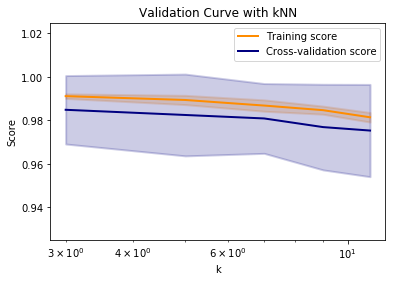

In [20]:
plot_validation_curve(myModel, XTrain, yTrain, kVals, myCV1, 0.925, 1.025)

Notes: Source code for plotting the curve from sklearn [[4]](http://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html). This curve can be also represented plotting **Error vs Model complexity** (instead of score). 

Error is low in both train and test and also standard deviation, so there is no clue of under-overfitting with the optimal number of neighbors (3) given by the GridSearchCV.

> QUESTION 4) Check the documentation for Scikit-learn library and configure the script for automatic validation (section 3) to allow that function GridSearchCV() uses Leave-one-out validation instead of K-fold. Describe which conclusions can be found from the mean scores of the cross validation and the test using a model with k neighbors with optimized k

LeaveOneOut CV method provides train/test indices to split data in train/test sets. Each sample is used once as a test set (singleton) while the remaining samples form the training set. LeaveOneOut is equivalent to KFold(n_splits=n) where n is the number of samples in the dataset.

In [21]:
from sklearn.model_selection import LeaveOneOut

## Run LeaveOunOut CV for kNN, hyperparameters combinations and Leave One Out CV

# Input model, hyperparameters and CV
XGrid = XTrain
yGrid = yTrain
myModel = KNeighborsClassifier()
kVals = range(3, 13, 2)
myParamGrid = {'n_neighbors': kVals, 'weights': ['uniform']}
myCV2 = LeaveOneOut()

# Run GridSearch CV for the given inputs
myBestModel2 = runMyGridSearchCV(myModel, myParamGrid, myCV2, XGrid, yGrid)

Fitting 1257 folds for each of 5 candidates, totalling 6285 fits
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] .

[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n

[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] .

[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n

[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n

[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] .

[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n

[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] .

[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n

[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ................... n_neighbors=5, weights=uniform, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ................... n_neighbors=7, weights=uniform, total=   0.0s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] .

[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] ................... n_neighbors=9, weights=uniform, total=   0.0s
[CV] n_neighbors=9, weights=uniform ..................................
[CV] .

[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .

[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .

[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .

[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .

[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .

[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .

[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .

[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .

[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .

[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .

[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .

[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .

[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .

[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .

[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .

[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .

[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .

[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .

[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .

[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .

[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .

[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .................. n_neighbors=11, weights=uniform, total=   0.0s
[CV] n_neighbors=11, weights=uniform .................................
[CV] .

[Parallel(n_jobs=1)]: Done 6285 out of 6285 | elapsed: 25.6min finished


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_neighbors,param_weights,params,rank_test_score,split0_test_score,split0_train_score,...,split999_test_score,split999_train_score,split99_test_score,split99_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.003461,0.000987,0.984089,0.991250,3,uniform,"{u'n_neighbors': 3, u'weights': u'uniform'}",2,1.0,0.991242,...,1.0,0.991242,1.0,0.991242,1.0,0.991242,0.000757,0.000529,0.125131,0.000123
1,0.003442,0.000994,0.985680,0.989657,5,uniform,"{u'n_neighbors': 5, u'weights': u'uniform'}",1,1.0,0.989650,...,1.0,0.989650,1.0,0.990446,1.0,0.989650,0.000780,0.000531,0.118806,0.000127
2,0.003434,0.000963,0.980111,0.988370,7,uniform,"{u'n_neighbors': 7, u'weights': u'uniform'}",3,1.0,0.988057,...,1.0,0.988057,1.0,0.988057,1.0,0.988057,0.000656,0.000457,0.139618,0.000418
3,0.003397,0.000987,0.979316,0.985673,9,uniform,"{u'n_neighbors': 9, u'weights': u'uniform'}",4,1.0,0.985669,...,1.0,0.985669,1.0,0.985669,1.0,0.985669,0.000728,0.000617,0.142325,0.000178
4,0.003403,0.000937,0.979316,0.984081,11,uniform,"{u'n_neighbors': 11, u'weights': u'uniform'}",4,1.0,0.984076,...,1.0,0.984076,1.0,0.984076,1.0,0.984076,0.000581,0.000441,0.142325,0.000189


Best estimator: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
Best grid score: 0.9856801909307876


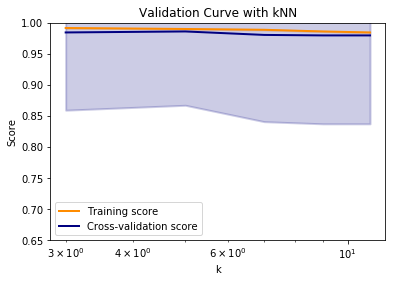

In [22]:
plot_validation_curve(myModel, XTrain, yTrain, kVals, myCV2, 0.65, 1)

Optimal k is similar to the obtained with KFold (5 vs 3). Tendency of train/CV scores is also similar, with no clues of under-overfitting. However, **CV score standard deviation is higher here respect ``KFold``** (around 11% here), one possible explanation is that it is because the training sets in ``LeaveOneOut`` have more overlap and that makes the estimates from different folds more dependent than in  ``KFold``, and hence increases the overall variance [[6]](https://stats.stackexchange.com/questions/90902/why-is-leave-one-out-cross-validation-loocv-variance-about-the-mean-estimate-f/110537).

> QUESTION 5) Think about if it is necessary to stratify CV process analyzing the distribution of samples per class.

In [23]:
from sklearn.model_selection import StratifiedKFold

myCV3 = StratifiedKFold(n_splits = 10, random_state=42)

# Run GridSearch CV for the given inputs
myBestModel3 = runMyGridSearchCV(myModel, myParamGrid, myCV3, XGrid, yGrid)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   11.1s finished


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_neighbors,param_weights,params,rank_test_score,split0_test_score,split0_train_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.0037,0.0296,0.984885,0.990983,3,uniform,"{u'n_neighbors': 3, u'weights': u'uniform'}",1,1.000000,0.989343,...,0.975806,0.991174,0.98374,0.990300,0.991803,0.992070,9.000566e-04,0.007800,0.010287,0.001242
1,0.0030,0.0293,0.984089,0.989306,5,uniform,"{u'n_neighbors': 5, u'weights': u'uniform'}",2,1.000000,0.987567,...,0.975806,0.989409,0.97561,0.987654,0.991803,0.988546,7.152557e-08,0.002685,0.010664,0.002246
2,0.0030,0.0282,0.978520,0.986299,7,uniform,"{u'n_neighbors': 7, u'weights': u'uniform'}",3,0.984733,0.984014,...,0.983871,0.985878,0.96748,0.987654,0.975410,0.985022,4.471812e-04,0.002786,0.008036,0.002173
3,0.0032,0.0285,0.976134,0.984883,9,uniform,"{u'n_neighbors': 9, u'weights': u'uniform'}",4,0.977099,0.981350,...,0.975806,0.985878,0.96748,0.985891,0.983607,0.985022,7.483155e-04,0.003041,0.010543,0.001887
4,0.0029,0.0273,0.974543,0.982141,11,uniform,"{u'n_neighbors': 11, u'weights': u'uniform'}",5,0.977099,0.978686,...,0.959677,0.983230,0.96748,0.984127,0.975410,0.984141,2.999783e-04,0.002795,0.012709,0.001792


Best estimator: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')
Best grid score: 0.984884645982498


Using the StratifiedKFold method, the same score is obtained as with the non-stratified KFold method. In this case, the stratification is not necessary for this dataset because all the samples by class are with the same proportion. Stratification would be necessary when you have a dataset with unbalanced samples.

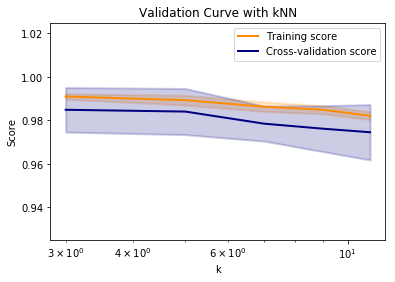

In [24]:
plot_validation_curve(myModel, XTrain, yTrain, kVals, myCV3, 0.925, 1.025)

In this case it can be seen that applying stratification we obtain similar results as with KFold: best k is 3 neighbors here, and Train / CV scores and standard deviation are similar to ``KFold`` case. According to the scores of train/CV in validation curves it seems that there is no overfitting with the selected k. Underfitting can happens with k >> 11 according to the tendency of the curves.

**Sumary** after applying KFold, LeaveOneOut and StratifiedKFold:

| CV method        | CV score      | CV std   | Train score  | Train std| Best k | Weights |
| ---------------- | -------------:| --------:|-------------:| --------:| ------:| -------:|
| **KFold**           | **0.9849**        | **0.0157**   | **0.9912**       | **0.0010**   |   **3**  | **uniform** |
| LeaveOneOut      | 0.9857        | 0.1188 | 0.9897       | 0.000127 |   5    | uniform |
| StratifiedKFold  | 0.9849        | 0.0103    | 0.991       | 0.0012 |   3    | uniform |

As the results were similar in the three CV options performed, we will continue with KFold option for Questions 6-7.

> QUESTION 6) Introduce in CV process the adjustment of distance metric weights between samples according to the parameter `` weights `` of the model in scikit-learn. Calculate the gain / loss in model performance when distance metric weights are adjusted in CV respect the example seen in class (unique adjustment of k).

By chosing ``distance`` for ``weight`` parameter in kNN, the estimator weight points by the inverse of their distance. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. 

By default distance ``metric`` set in kNN is ``Euclidean`` (distance function is ``sqrt(sum((x - y)^2))``), as parameter for the Minkowski metric ``p`` is 2 by default. Let's run GridSearchCV using ``distance`` weights and compare the result with the previously obtained ``uniform``.

In [25]:
## Run GridSearchCV for kNN, hyperparameters with weights: distance combinations and non-stratified K-Fold

# Hyperparameters and CV
myParamGrid = {'n_neighbors': kVals, 'weights': ['distance']}
myCV4 = KFold(n_splits = 10, random_state=42)

# Run GridSearch CV for the given inputs
myBestModel4 = runMyGridSearchCV(myModel, myParamGrid, myCV4, XGrid, yGrid)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] n_neighbors=3, weights=distance .................................
[CV] .................. n_neighbors=3, weights=distance, total=   0.0s
[CV] n_neighbors=3, weights=distance .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .................. n_neighbors=3, weights=distance, total=   0.0s
[CV] n_neighbors=3, weights=distance .................................
[CV] .................. n_neighbors=3, weights=distance, total=   0.0s
[CV] n_neighbors=3, weights=distance .................................
[CV] .................. n_neighbors=3, weights=distance, total=   0.0s
[CV] n_neighbors=3, weights=distance .................................
[CV] .................. n_neighbors=3, weights=distance, total=   0.0s
[CV] n_neighbors=3, weights=distance .................................
[CV] .................. n_neighbors=3, weights=distance, total=   0.0s
[CV] n_neighbors=3, weights=distance .................................
[CV] .................. n_neighbors=3, weights=distance, total=   0.0s
[CV] n_neighbors=3, weights=distance .................................
[CV] .................. n_neighbors=3, weights=distance, total=   0.0s
[CV] n_neighbors=3, weights=distance .................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   11.0s finished


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_neighbors,param_weights,params,rank_test_score,split0_test_score,split0_train_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.0032,0.0257,0.985680,1.0,3,distance,"{u'n_neighbors': 3, u'weights': u'distance'}",1,1.000000,1.0,...,1.000,1.0,0.952,1.0,1.0,1.0,0.000400,0.004627,0.015451,0.0
1,0.0032,0.0271,0.984089,1.0,5,distance,"{u'n_neighbors': 5, u'weights': u'distance'}",2,1.000000,1.0,...,1.000,1.0,0.944,1.0,1.0,1.0,0.000600,0.002385,0.018171,0.0
2,0.0032,0.0277,0.982498,1.0,7,distance,"{u'n_neighbors': 7, u'weights': u'distance'}",3,0.992063,1.0,...,1.000,1.0,0.944,1.0,1.0,1.0,0.000748,0.002571,0.017386,0.0
3,0.0033,0.0270,0.981702,1.0,9,distance,"{u'n_neighbors': 9, u'weights': u'distance'}",4,0.984127,1.0,...,1.000,1.0,0.936,1.0,1.0,1.0,0.000640,0.002049,0.018885,0.0
4,0.0035,0.0305,0.977725,1.0,11,distance,"{u'n_neighbors': 11, u'weights': u'distance'}",5,0.984127,1.0,...,0.992,1.0,0.936,1.0,1.0,1.0,0.001025,0.006932,0.019775,0.0


Best estimator: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='distance')
Best grid score: 0.9856801909307876


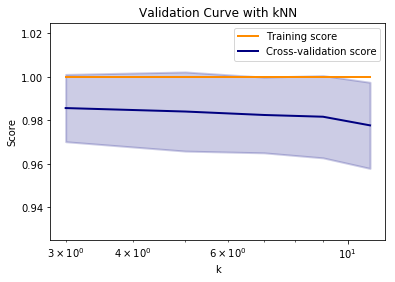

In [26]:
myModel2 = KNeighborsClassifier(weights="distance")
plot_validation_curve(myModel2, XTrain, yTrain, kVals, myCV4, 0.925, 1.025)

Results were very similar to KFold with the difference that we increased here training accuracy up to 100% without jeopardizing generalization ability in the model. In the following table, the scores obtained for each of the cross-validation types and their parameters are showed:

| CV method | CV score | CV std | Train score  | Train std| Best k | Weights | Metric |
| --------- | --------:| ------:|-------------:| --------:| ------:| -------:|-------:|
| KFold  | 0.9848        | 0.0157    | 0.9912       |0.0010 |   3    | uniform |        |
| KFold     | 0.9856   | 0.0154      | 1       | 0 |   3   | distance | Euclidean |

> QUESTION 7) Following the same approach as in the previous question, introduce the type of distance ``metric`` in CV process. Evaluate the results and gain / losses of generalization capacity of the model.

Below several other distance metrics feasible for this dataset (real-valued vector space) are tested: 
- **manhattan** (distance function:  ``sum(|x - y|)``) 
- **chebyshev** (distance function:  ``max(|x - y|)``):

In [27]:
## Run GridSearchCV for kNN, hyperparameters with weights: distance combinations and non-stratified K-Fold

# Hyperparameters and CV
myParamGrid = {'n_neighbors': kVals, 'weights': ['distance'], 'metric': ['manhattan','chebyshev']}
myCV5 = KFold(n_splits = 10, random_state=42)

# Run GridSearch CV for the given inputs
myBestModel5 = runMyGridSearchCV(myModel, myParamGrid, myCV5, XGrid, yGrid)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] n_neighbors=3, metric=manhattan, weights=distance ...............
[CV]  n_neighbors=3, metric=manhattan, weights=distance, total=   0.0s
[CV] n_neighbors=3, metric=manhattan, weights=distance ...............
[CV]  n_neighbors=3, metric=manhattan, weights=distance, total=   0.0s
[CV] n_neighbors=3, metric=manhattan, weights=distance ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  n_neighbors=3, metric=manhattan, weights=distance, total=   0.0s
[CV] n_neighbors=3, metric=manhattan, weights=distance ...............
[CV]  n_neighbors=3, metric=manhattan, weights=distance, total=   0.0s
[CV] n_neighbors=3, metric=manhattan, weights=distance ...............
[CV]  n_neighbors=3, metric=manhattan, weights=distance, total=   0.0s
[CV] n_neighbors=3, metric=manhattan, weights=distance ...............
[CV]  n_neighbors=3, metric=manhattan, weights=distance, total=   0.0s
[CV] n_neighbors=3, metric=manhattan, weights=distance ...............
[CV]  n_neighbors=3, metric=manhattan, weights=distance, total=   0.0s
[CV] n_neighbors=3, metric=manhattan, weights=distance ...............
[CV]  n_neighbors=3, metric=manhattan, weights=distance, total=   0.0s
[CV] n_neighbors=3, metric=manhattan, weights=distance ...............
[CV]  n_neighbors=3, metric=manhattan, weights=distance, total=   0.0s
[CV] n_neighbors=3, metric=manhattan, weights=distance ...............
[CV]  

[CV]  n_neighbors=5, metric=chebyshev, weights=distance, total=   0.0s
[CV] n_neighbors=5, metric=chebyshev, weights=distance ...............
[CV]  n_neighbors=5, metric=chebyshev, weights=distance, total=   0.0s
[CV] n_neighbors=5, metric=chebyshev, weights=distance ...............
[CV]  n_neighbors=5, metric=chebyshev, weights=distance, total=   0.0s
[CV] n_neighbors=5, metric=chebyshev, weights=distance ...............
[CV]  n_neighbors=5, metric=chebyshev, weights=distance, total=   0.0s
[CV] n_neighbors=5, metric=chebyshev, weights=distance ...............
[CV]  n_neighbors=5, metric=chebyshev, weights=distance, total=   0.0s
[CV] n_neighbors=5, metric=chebyshev, weights=distance ...............
[CV]  n_neighbors=5, metric=chebyshev, weights=distance, total=   0.0s
[CV] n_neighbors=5, metric=chebyshev, weights=distance ...............
[CV]  n_neighbors=5, metric=chebyshev, weights=distance, total=   0.0s
[CV] n_neighbors=5, metric=chebyshev, weights=distance ...............
[CV]  

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   16.6s finished


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_metric,param_n_neighbors,param_weights,params,rank_test_score,split0_test_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.0028,0.0204,0.980111,1.0,manhattan,3,distance,"{u'n_neighbors': 3, u'metric': u'manhattan', u...",1,1.000000,...,0.984,1.0,0.960,1.0,0.992,1.0,0.000600,0.004454,0.017151,0.0
1,0.0027,0.0192,0.980111,1.0,manhattan,5,distance,"{u'n_neighbors': 5, u'metric': u'manhattan', u...",1,1.000000,...,0.984,1.0,0.944,1.0,0.992,1.0,0.000458,0.001600,0.018598,0.0
2,0.0027,0.0205,0.978520,1.0,manhattan,7,distance,"{u'n_neighbors': 7, u'metric': u'manhattan', u...",3,0.984127,...,0.984,1.0,0.944,1.0,1.000,1.0,0.000458,0.002419,0.017107,0.0
3,0.0027,0.0188,0.976134,1.0,manhattan,9,distance,"{u'n_neighbors': 9, u'metric': u'manhattan', u...",5,0.992063,...,0.976,1.0,0.936,1.0,1.000,1.0,0.000458,0.000872,0.017833,0.0
4,0.0025,0.0195,0.976134,1.0,manhattan,11,distance,"{u'n_neighbors': 11, u'metric': u'manhattan', ...",5,0.984127,...,0.976,1.0,0.936,1.0,1.000,1.0,0.000500,0.001025,0.018528,0.0
5,0.0025,0.0143,0.978520,1.0,chebyshev,3,distance,"{u'n_neighbors': 3, u'metric': u'chebyshev', u...",3,0.984127,...,1.000,1.0,0.952,1.0,0.992,1.0,0.000671,0.002283,0.019500,0.0
6,0.0025,0.0143,0.972951,1.0,chebyshev,5,distance,"{u'n_neighbors': 5, u'metric': u'chebyshev', u...",7,0.976190,...,1.000,1.0,0.920,1.0,0.992,1.0,0.000500,0.000458,0.024223,0.0
7,0.0023,0.0155,0.972156,1.0,chebyshev,7,distance,"{u'n_neighbors': 7, u'metric': u'chebyshev', u...",8,0.968254,...,1.000,1.0,0.912,1.0,0.984,1.0,0.000640,0.001204,0.025279,0.0
8,0.0023,0.0155,0.972156,1.0,chebyshev,9,distance,"{u'n_neighbors': 9, u'metric': u'chebyshev', u...",8,0.976190,...,1.000,1.0,0.920,1.0,0.984,1.0,0.000458,0.000500,0.024753,0.0
9,0.0023,0.0160,0.971360,1.0,chebyshev,11,distance,"{u'n_neighbors': 11, u'metric': u'chebyshev', ...",10,0.968254,...,0.992,1.0,0.928,1.0,0.992,1.0,0.000458,0.000775,0.021136,0.0


Best estimator: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='distance')
Best grid score: 0.9801113762927606


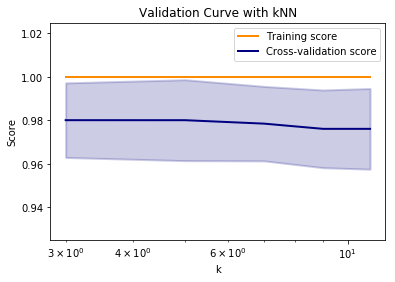

In [28]:
myModel3 = KNeighborsClassifier(weights="distance", metric="manhattan")
plot_validation_curve(myModel3, XTrain, yTrain, kVals, myCV5, 0.925, 1.025)

CV score obtained using ``manhattan`` distance metric was a little bit slower than using euclidean distance, so let's follow the rest of pending STEPS 5-7 with **euclidean distance model**.

## STEP 5: Fit the Best Model with XTrain, YTrain

In [29]:
##Fit model with Best estimator from step 3

myBestModel = myBestModel4
myBestModel.fit(XTrain, yTrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='distance')

## STEP 6: Evaluate the score on XTest prediction

In [30]:
## Predict XTest labels
yPred = myBestModel.predict(XTest)
yTrue = yTest

Below several metrics for quantifying the quality of the prediction are checked. The metrics below are some of the suitable metrics for binary targets, as it this is the case.

**- Accuracy score**

In [31]:
from sklearn.metrics import accuracy_score

## Accuracy score
print("Accuracy score: " + str(accuracy_score(yTrue, yPred)))

Accuracy score: 0.9888888888888889


We can see that the best estimator chosen works well with the remaining XTest data, with an accuracy of ~99%.

**- Classification report**

Using classification report we can see how well the different classes (hand written digits 0..9) are predicted with the obtained best model.

- The **precision** is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
- The **recall** is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
- The **f1-score** can be interpreted as a weighted harmonic mean of the precision and recall, where an f1-score reaches its best value at 1 and worst score at 0. The f1-score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.
- The **support** is the number of occurrences of each class in y_true.

In [32]:
# Classification report
print("CLASSIFICATION REPORT USING THE BEST ESTIMATOR:")
print(classification_report(yTrue, yPred))

CLASSIFICATION REPORT USING THE BEST ESTIMATOR:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        53
          1       0.98      1.00      0.99        50
          2       1.00      1.00      1.00        47
          3       0.98      1.00      0.99        54
          4       0.98      1.00      0.99        60
          5       0.99      1.00      0.99        66
          6       1.00      1.00      1.00        53
          7       1.00      0.98      0.99        55
          8       0.98      0.98      0.98        43
          9       0.98      0.93      0.96        59

avg / total       0.99      0.99      0.99       540



Conclusions testing on XTest:
- **Precision** for all the classes is balanced 
- **Recall** for all the classes is also balanced. As a remark, handwritten digit "9" is the class worst predicted by the estimator, recognizing other number instead in a 7% of the cases.

Confusion matrix below shows recall information in more detail:

**- Confusion matrix**

The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

The figures show the confusion matrix with and without normalization by class support size (number of elements in each class). This kind of normalization can be interesting in case of class imbalance to have a more visual interpretation of which class is being misclassified.

In [33]:
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

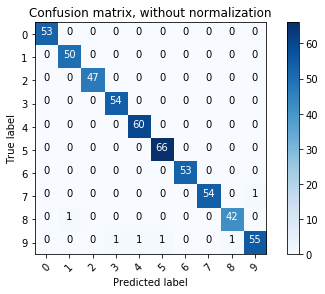

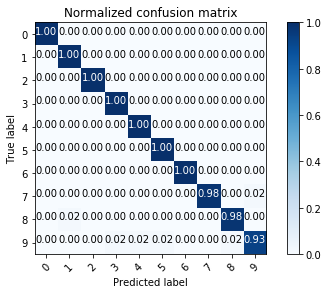

In [34]:
# Compute confusion matrix
confMatrix = confusion_matrix(yTrue, yPred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(confMatrix, classes=labelClasses, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(confMatrix, classes=labelClasses, normalize=True, title='Normalized confusion matrix')

As we saw in classification report, number 9 has the higher number of incorrect predictions. The classes with which the estimator confuses number 9 are 2, 3, 4, 5 and 8.

## STEP 7: CV with the complete dataset

Now that the estimator performed well in cross-validation and with unseen data (XTest), now it is time to check that taking the complete dataset and showing the estimator brand-new splits, it can be fit and predict accurately, and with low standard deviation between the splits. For that purpose, we can use ``cross_val_score`` function, with the inputs of the Best Estimator, (X,y) and a CV strategy:

In [35]:
from sklearn.model_selection import cross_val_score

myShuffleSplit = ShuffleSplit(10, 0.3, random_state = 42)
myCrosValScore = cross_val_score(myBestModel, X, y, cv=myShuffleSplit)

print(myCrosValScore)
print ("Mean accuracy score: " + str(np.mean(myCrosValScore)))
print ("Std deviation: " + str(np.std(myCrosValScore)))

[0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99]
Mean accuracy score: 0.9866666666666667
Std deviation: 0.0018144368465060627


As showed, **estimator is still robust when facing 100 new splits of the dataset**, with an **mean score of 98,66 %** and a **low standard deviation between splits (1,81 %)**.

**Summary of the results**:

| (XTrain,yTrain)<br> CV score | (XTrain,yTrain)<br> CV std | (XTrain,yTrain)<br> Train score | (XTrain,yTrain) <br>Train std | Best k | Weights | metric | (XTest)<br> acc_score | (X,y)<br> mean_acc_score | (X,y)<br> std_acc_score |
| -------- | --------:|-------------:| --------:| ------:| -------:| ---------:|---------:|---------:|
| 0.9856   | 0.0154      | 1       | 0 |   10     | distance| manhattan | 0.9888 | 0.9866| 0.00181|

**- Validation and Learning curves**

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

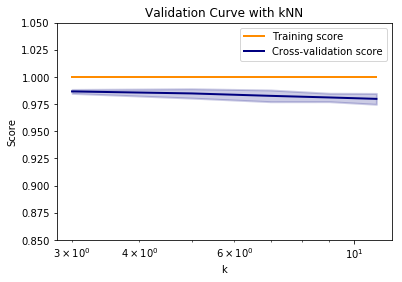

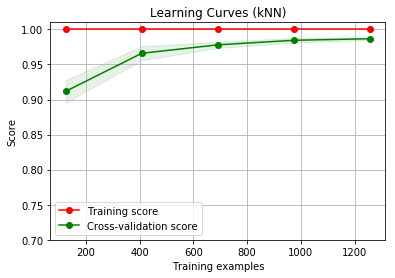

In [39]:
myShuffleSplit = ShuffleSplit(10, 0.3, random_state = 42)

# Plot validation curve
myModel2 = KNeighborsClassifier(weights="distance")
plot_validation_curve(myModel2, X, y, kVals, myShuffleSplit, 0.85, 1.05)

# Plot learning curve
plot_learning_curve(myBestModel, "Learning Curves (kNN)", X, y, ylim=(0.7, 1.01), cv=myShuffleSplit, n_jobs=4)
plt.show()

Both Validation and Learning curves are useful tools for under and overfitting evaluation.

Representing them for the entire dataset and the given final CV, we get the following conclusions:
- **Validation curve**: Selecting {k=3, euclidean distance} for our model does not seem to mean that we are in an overfitting situation, as there is **low bias (error) in both training and CV**.
- **Learning curve**: reasoning is similar as in validation curve, there is **low bias for both training and CV** and **gap between training and CV is small, which means a low variance**.